<a href="https://colab.research.google.com/github/Klarisa12/Kelompok-8_Tugas-Besar-Analitik/blob/main/Tubes_Naive_Bayes_Revisi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Realdi Putra Pratama Pasaribu /super store1.xlsx')
df.head()

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,Market.ID,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,delivery_duration
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0,US,1,2011-01-07 00:00:00,CA-2011-130813,...,19,Consumer,2011-01-09,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0,US,1,2011-01-21 00:00:00,CA-2011-148614,...,19,Consumer,2011-01-26,Standard Class,0.94,California,Paper,2011,North America,5
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0,US,1,2011-08-05 00:00:00,CA-2011-118962,...,21,Consumer,2011-08-09,Standard Class,1.81,California,Paper,2011,North America,4
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0,US,1,2011-08-05 00:00:00,CA-2011-118962,...,111,Consumer,2011-08-09,Standard Class,4.59,California,Paper,2011,North America,4
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0,US,1,2011-09-29 00:00:00,CA-2011-146969,...,6,Consumer,2011-10-03,Standard Class,1.32,California,Paper,2011,North America,4


In [ ]:
df.describe()

,Discount,Market.ID,Profit,Quantity,Row.ID,Sales,Ship.Date,Shipping.Cost,Year,delivery_duration
count,319.0,319.0,3.190000e+02,319.000000,319.000000,319.000000,319,319.000000,319.000000,319.000000
mean,0.0,1.0,1.108728e+04,3.799373,36352.300940,110.561129,2013-02-21 14:58:18.432601856,12.770094,2012.561129,3.836991
min,0.0,1.0,0.000000e+00,1.000000,31299.000000,3.000000,2011-01-09 00:00:00,0.060000,2011.000000,0.000000
25%,0.0,1.0,5.407600e+00,2.000000,33949.500000,13.500000,2012-03-25 12:00:00,1.310000,2012.000000,3.000000
50%,0.0,1.0,1.132880e+01,3.000000,36296.000000,32.000000,2013-02-01 00:00:00,2.990000,2013.000000,4.000000
75%,0.0,1.0,2.994600e+01,5.000000,38724.500000,96.000000,2013-12-31 12:00:00,8.865000,2013.000000,5.000000
max,0.0,1.0,1.366176e+06,14.000000,41272.000000,1641.000000,2014-12-26 00:00:00,506.490000,2014.000000,8.000000
std,0.0,0.0,8.857436e+04,2.175594,2820.410207,220.691313,NaN,38.919295,1.096819,1.707847


In [ ]:
df.head()

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,Market.ID,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,delivery_duration
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0,US,1,2011-01-07 00:00:00,CA-2011-130813,...,19,Consumer,2011-01-09,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0,US,1,2011-01-21 00:00:00,CA-2011-148614,...,19,Consumer,2011-01-26,Standard Class,0.94,California,Paper,2011,North America,5
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0,US,1,2011-08-05 00:00:00,CA-2011-118962,...,21,Consumer,2011-08-09,Standard Class,1.81,California,Paper,2011,North America,4
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0,US,1,2011-08-05 00:00:00,CA-2011-118962,...,111,Consumer,2011-08-09,Standard Class,4.59,California,Paper,2011,North America,4
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0,US,1,2011-09-29 00:00:00,CA-2011-146969,...,6,Consumer,2011-10-03,Standard Class,1.32,California,Paper,2011,North America,4


In [ ]:
selected_features = ['Ship.Mode', 'Category', 'Region', 'Sales', 'Quantity', 'Discount', 'Profit','Shipping.Cost','Sub.Category']
df = df[selected_features + ['delivery_duration']].dropna()

<ipython-input-21-bc1c46c86f2e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='delivery_duration',data=df,palette='flare')


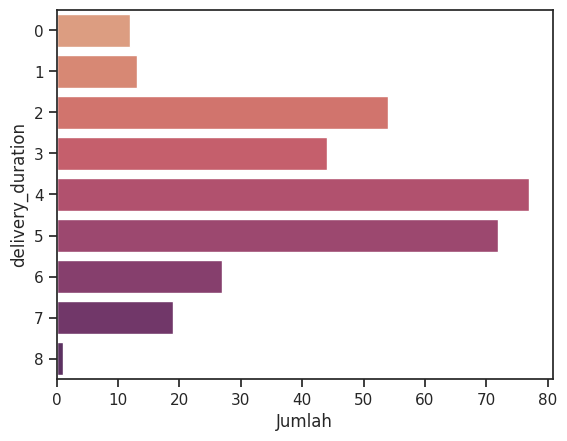

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='ticks')
sns.countplot(y='delivery_duration',data=df,palette='flare')
plt.xlabel('Jumlah')
plt.ylabel('delivery_duration')
plt.show()

In [ ]:
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [ ]:
x = df.drop('delivery_duration', axis=1)
y = df['delivery_duration']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [ ]:
# y_pred = classifier.predict(x_test) # Incorrect variable name
y_pred = model.predict(x_test)      # Correct variable name
y_pred

array([7, 7, 7, 7, 7, 7, 7, 7, 0, 7, 7, 7, 0, 7, 0, 7, 0, 7, 4, 7, 7, 7,
       7, 7, 7, 7, 2, 7, 0, 7, 7, 7, 7, 7, 4, 7, 7, 7, 7, 7, 7, 7, 7, 2,
       0, 0, 7, 0, 7, 7, 0, 2, 7, 7, 7, 0, 7, 7, 7, 7, 7, 0, 0, 7, 0, 7,
       0, 0, 4, 2, 7, 7, 4, 7, 7, 7, 4, 7, 7, 7])

In [ ]:
y_pred = model.predict(x_test)      # Correct variable name
y_pred

array([7, 7, 7, 7, 7, 7, 7, 7, 0, 7, 7, 7, 0, 7, 0, 7, 0, 7, 4, 7, 7, 7,
       7, 7, 7, 7, 2, 7, 0, 7, 7, 7, 7, 7, 4, 7, 7, 7, 7, 7, 7, 7, 7, 2,
       0, 0, 7, 0, 7, 7, 0, 2, 7, 7, 7, 0, 7, 7, 7, 7, 7, 0, 0, 7, 0, 7,
       0, 0, 4, 2, 7, 7, 4, 7, 7, 7, 4, 7, 7, 7])

In [ ]:
akurasi = classification_report(y_test, y_pred)
print(akurasi)

              precision    recall  f1-score   support

           0       0.13      0.40      0.20         5
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00        17
           5       0.00      0.00      0.00        13
           6       0.00      0.00      0.00         7
           7       0.09      0.71      0.16         7
           8       0.00      0.00      0.00         1

    accuracy                           0.09        80
   macro avg       0.03      0.14      0.04        80
weighted avg       0.02      0.09      0.03        80



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
akurasi = accuracy_score(y_test, y_pred)
print(f'Tingkat Akurasi: %d persen'%(akurasi * 1000))

Tingkat Akurasi: 87 persen


In [ ]:
testing1 = pd.DataFrame({
    'Ship.Mode': [20],
    'Category': [1],
    'Region': [1],
    'Sales': [12345],
    'Quantity': [220],
    'Discount': [220],
    'Profit':[380],
    'Shipping.Cost':[20],
    'Sub.Category':[23]})
# testing1 = pd.DataFrame(testing1) # This line is redundant
testing1

,Ship.Mode,Category,Region,Sales,Quantity,Discount,Profit,Shipping.Cost,Sub.Category
0,20,1,1,12345,220,220,380,20,23


In [ ]:
y_pred_1 = model.predict(testing1)

print(f'Hasil Prediksi 1 : {y_pred_1}')

Hasil Prediksi 1 : [2]
